<cite>Darryl Oatridge, August 2022<cite>

In [32]:
import os

In [33]:
os.environ['HADRON_PM_PATH'] = '../0_hello_meta/demo/contracts'
os.environ['HADRON_DEFAULT_PATH'] = '../0_hello_meta/demo/data'

In [34]:
from ds_discovery import Wrangle, Transition

In [35]:
# get the instance
wr = Wrangle.from_env('hello_wr', has_contract=False)

In [36]:
source = Transition.from_env('hello_tr').get_persist_contract()
wr.set_source_contract(source)
wr.set_persist()

In [37]:
df = wr.load_source_canonical()

In [38]:
wr.canonical_report(df)

,Attributes (10),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,20.1%,20.1%,1309,99,max=80.0 | min=0.1667 | mean=29.88 | dominant=24.0
1,cabin,string,77.5%,77.5%,1309,187,Sample: C23 C25 C27 | G6 | B57 B59 B63 B66 | F4 | F33
2,embarked,category,0.0%,69.8%,1309,4,Sample: S | C | Q | nan
3,fare,float64,0.1%,4.6%,1309,282,max=512.3292 | min=0.0 | mean=33.3 | dominant=8.05
4,parch,int64,0.0%,76.5%,1309,8,max=9 | min=0 | mean=0.39 | dominant=0
5,pclass,int64,0.0%,54.2%,1309,3,max=3 | min=1 | mean=2.29 | dominant=3
6,sex,category,0.0%,64.4%,1309,2,Sample: male | female
7,sibsp,int64,0.0%,68.1%,1309,7,max=8 | min=0 | mean=0.5 | dominant=0
8,survived,int64,0.0%,61.8%,1309,2,max=1 | min=0 | mean=0.38 | dominant=0
9,ticket,string,0.0%,0.8%,1309,929,Sample: CA. 2343 | 1601 | CA 2144 | PC 17608 | 347077


v

In [39]:
df['cabin'] = wr.tools.correlate_custom(df, code_str="@['cabin'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)", column_name='cabin')
df['family'] = wr.tools.correlate_aggregate(df, headers=['parch', 'sibsp'], agg='sum', column_name='family')

In [40]:
selection = [wr.tools.select2dict(column='family', condition='@==0')]
df['is_alone'] = wr.tools.correlate_selection(df, selection=selection, action=1, default_action=0, column_name='is_alone')

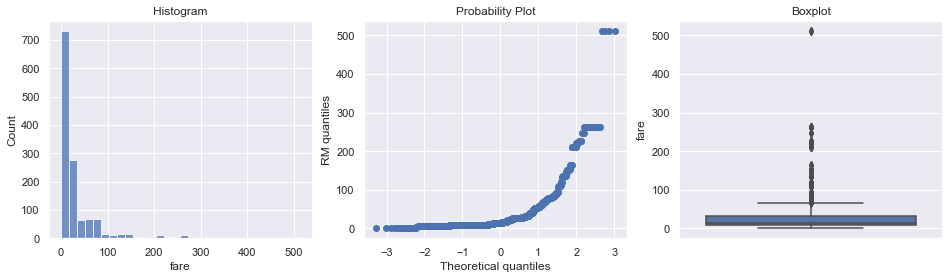

<Figure size 432x288 with 0 Axes>

In [41]:
wr.visual.show_distribution(df, 'fare')

In [42]:
df['fare_category'] = wr.tools.correlate_discrete_intervals(df, header='fare', upper=70, 
                                                            granularity=[(0,8),(8,14),(14,30),(30,70)], 
                                                            categories=['Low','Low_Mid', 'High_Mid','High'], 
                                                            intent_order=0, column_name='fare_category')

In [43]:
df = wr.tools.model_to_category(df, headers='fare_category', intent_order=1, column_name='fare_category')

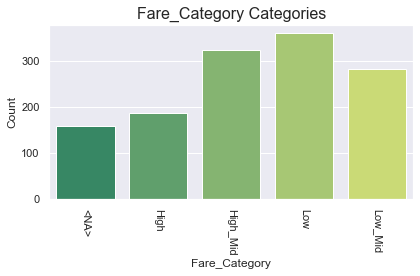

<Figure size 432x288 with 0 Axes>

In [44]:
wr.visual.show_categories(df, headers='fare_category')

In [45]:
wr.report_intent()

,level,order,intent,parameters,creator
0,cabin,0,correlate_custom,"[""code_str='@['cabin'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)'"", ""column_name='cabin'"", 'kwargs={}']",doatridge
1,family,0,correlate_aggregate,"[""headers=['parch', 'sibsp']"", ""agg='sum'"", ""column_name='family'""]",doatridge
2,fare_category,0,correlate_discrete_intervals,"[""header='fare'"", 'granularity=[(0, 8), (8, 14), (14, 30), (30, 70)]', 'upper=70', ""categories=['Low', 'Low_Mid', 'High_Mid', 'High']"", ""column_name='fare_category'""]",doatridge
3,,1,model_to_category,"[""headers='fare_category'"", ""column_name='fare_category'""]",doatridge
4,is_alone,0,correlate_selection,"[""selection=[{'column': 'family', 'condition': '@==0'}]"", 'action=1', 'default_action=0', ""column_name='is_alone'""]",doatridge


## Component Pipeline

In [46]:
wr.run_component_pipeline()

In [47]:
wr.canonical_report(wr.load_persist_canonical())

,Attributes (13),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,20.1%,20.1%,1309,99,max=80.0 | min=0.1667 | mean=29.88 | dominant=24.0
1,cabin,object,77.5%,77.5%,1309,182,Sample: F | C23 | G6 | B57 | C78
2,embarked,category,0.0%,69.8%,1309,4,Sample: S | C | Q | nan
3,family,int64,0.0%,60.4%,1309,9,max=10 | min=0 | mean=0.88 | dominant=0
4,fare,float64,0.1%,4.6%,1309,282,max=512.3292 | min=0.0 | mean=33.3 | dominant=8.05
5,fare_category,category,0.0%,27.5%,1309,5,Sample: Low | High_Mid | Low_Mid | High |
6,is_alone,int64,0.0%,60.4%,1309,2,max=1 | min=0 | mean=0.6 | dominant=1
7,parch,int64,0.0%,76.5%,1309,8,max=9 | min=0 | mean=0.39 | dominant=0
8,pclass,int64,0.0%,54.2%,1309,3,max=3 | min=1 | mean=2.29 | dominant=3
9,sex,category,0.0%,64.4%,1309,2,Sample: male | female
